<a href="https://colab.research.google.com/github/navi004/Deep-Learning-CSE4037-/blob/main/DL_Lab5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network - Lab5
### Naveen N
### 22MIA1049

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
cifar = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

cn = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


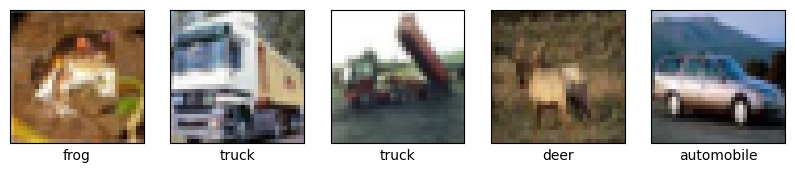

In [5]:
#display samples from x_train

num_samples = 5
plt.figure(figsize=(10, 5))
for i in range(num_samples):
  plt.subplot(1, num_samples, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(cn[y_train[i][0]])
plt.show()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,770 (225.66 KB)

 Trainable params: 57,770 (225.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3388 - loss: 1.7817 - val_accuracy: 0.5201 - val_loss: 1.3146
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5458 - loss: 1.2653 - val_accuracy: 0.5498 - val_loss: 1.2596
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6168 - loss: 1.0955 - val_accuracy: 0.6177 - val_loss: 1.0957
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6512 - loss: 0.9881 - val_accuracy: 0.6447 - val_loss: 1.0217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6829 - loss: 0.9088 - val_accuracy: 0.6726 - val_loss: 0.9406
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7046 - loss: 0.8455 - val_accuracy: 0.6548 - val_loss: 0.9923
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7191 - loss: 0.8026 - val_accuracy: 0.6896 - val_loss: 0.9063
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7338 - loss: 0.7584

In [14]:
!wget https://imgs.search.brave.com/kwPmtz7C3zEb2Y19e_QNl4ZC100ewe_XQuZxSwYSLCA/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly90NC5m/dGNkbi5uZXQvanBn/LzAxLzg0LzAxLzE3/LzM2MF9GXzE4NDAx/MTczOV94TnpPNWN4/ZHZhSlRMQjVYclhN/RHRhV3M5VmYwS2Q3/OC5qcGc

--2025-02-24 20:44:45--  https://imgs.search.brave.com/kwPmtz7C3zEb2Y19e_QNl4ZC100ewe_XQuZxSwYSLCA/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly90NC5m/dGNkbi5uZXQvanBn/LzAxLzg0LzAxLzE3/LzM2MF9GXzE4NDAx/MTczOV94TnpPNWN4/ZHZhSlRMQjVYclhN/RHRhV3M5VmYwS2Q3/OC5qcGc
Resolving imgs.search.brave.com (imgs.search.brave.com)... 13.33.45.71, 13.33.45.22, 13.33.45.37, ...
Connecting to imgs.search.brave.com (imgs.search.brave.com)|13.33.45.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29287 (29K) [image/jpeg]
Saving to: ‘OC5qcGc’

OC5qcGc             100%[===================>]  28.60K  --.-KB/s    in 0s      

2025-02-24 20:44:45 (184 MB/s) - ‘OC5qcGc’ saved [29287/29287]



In [18]:
image_path ="/content/OC5qcGc"

image = Image.open(image_path)
image = image.resize((32, 32))
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)
prediction = model.predict(image_array)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[4.08546859e-03, 2.10689455e-02, 1.26400322e-04, 6.21802406e-04,
        1.75842717e-02, 1.57508091e-03, 2.08024008e-04, 3.88401240e-05,
        9.43310797e-01, 1.13803875e-02]], dtype=float32)

In [21]:
print(prediction.argmax())
pred = cn[prediction.argmax()]
pred

8


'ship'

Text(0.5, 0, 'ship')

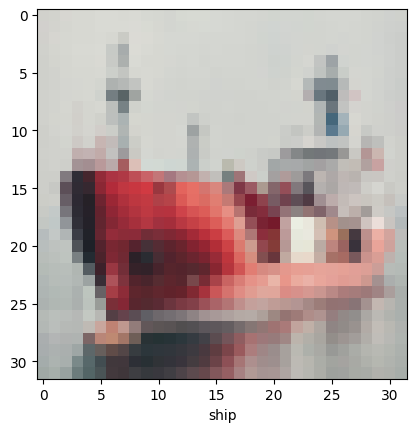

In [20]:
plt.imshow(image)
plt.xlabel(pred)